In [2]:
##Note: only take Magnitude error datas, other errors were repropagated
tau=4
F_g=1217
F_r=440
F_i=119
T=100000

A_e_g=4.006
A_e_r=3.1157
A_e_i=1.7804
n_r=14.5
n_t=.01

import numpy as np 
n_tg=F_g*A_e_g+0.01+.1*A_e_g*.7
n_tr=F_r*A_e_r+0.01+.1*A_e_r*.9
n_ti=F_i*A_e_i+0.01+.1*A_e_i*.4

SNR_g=((F_g*A_e_g*tau))/((n_r**2+tau*n_tg)**.5)
SNR_r=((F_r*A_e_r*tau))/((n_r**2+tau*n_tr)**.5)
SNR_i=((F_i*A_e_i*tau))/((n_r**2+tau*n_ti)**.5)

error_F_g=F_g/SNR_g
error_F_r=F_r/SNR_r
error_F_i=F_r/SNR_i

D=138.25
D_err=0.06
ZP_g=21.72
ZP_r=21.13

M_g=np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_g)*(1/(D*np.log(10)))*D_err)**2)
M_r=np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_r)*(1/(D*np.log(10)))*D_err)**2)
print('M error',np.sqrt(M_g**2+M_r**2))

error_t_g=T*(n_r**2+tau*n_t)**.5/(F_g**2*A_e_g*tau)
error_t_r=T*(n_r**2+tau*n_t)**.5/(F_r**2*A_e_r*tau)
#error_t_i=T*(n_r**2+tau*n_t)**.5/(F_i**2*A_e_i*tau)
error=(error_t_g**2+error_t_r**2)**.5

SNR_g=((F_g**2*A_e_g*tau))/((n_r**2+tau*n_t)**.5)
SNR_r=((F_g**2*A_e_r*tau))/((n_r**2+tau*n_t)**.5)
print(F_g/SNR_g)
print(F_r/SNR_r)
#print(F_i/SNR)

S_0=3.83*10**26
l_g=(1.57E+25)/(S_0)
l_r=(9.76E+24)/(S_0)
l_i=(6.72E+24)/(S_0)

error_l_g=l_g*(n_r**2+tau*n_t)**.5/(F_g**2*A_e_g*tau)
error_l_r=l_r*(n_r**2+tau*n_t)**.5/(F_r**2*A_e_r*tau)
error_l_i=l_i*(n_r**2+tau*n_t)**.5/(F_i**2*A_e_r*tau)


ZP_i=20.11
error_L_g=(0.4*np.log(l_g))*np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_g)*(1/(D*np.log(10)))*D_err)**2)
error_L_r=(0.4*np.log(l_r))*np.sqrt((-2.5*(np.log10(D)/(F_r*np.log(10)))*error_F_r)**2 +
    ( (-2.5*np.log10(F_r)+ZP_r)*(1/(D*np.log(10)))*D_err)**2)
error_L_i=(0.4*np.log(l_i))*np.sqrt((-2.5*(np.log10(D)/(F_i*np.log(10)))*error_F_i)**2 +
    ( (-2.5*np.log10(F_i)+ZP_i)*(1/(D*np.log(10)))*D_err)**2)

error_T_g=(error_L_g)/(l_g**(3/4))
error_T_r=(error_L_r)/(l_r**(3/4))
error_T_i=(error_L_i)/(l_i**(3/4))

error_T=np.sqrt(error_T_g**2+error_T_r**2)

print('SNR=',np.sqrt(SNR_g**2+SNR_r**2+SNR_i**2))

print('Error(L_g)=',error_L_g,'Error(L_r)=',error_L_r,'Error(L_i)=',error_L_i)

M error 0.02394528788337962
0.0007436144081303948
0.00034567279793360764
SNR= 2073327.2835565442
Error(L_g)= -0.02164554042141517 Error(L_r)= -0.0471230191338163 Error(L_i)= -0.5334333509787935


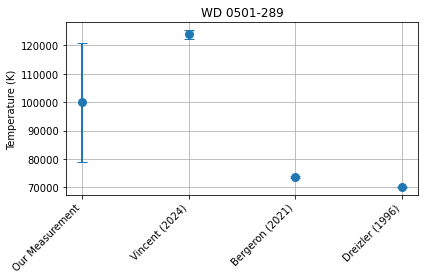

In [3]:
import matplotlib.pyplot as plt
import numpy as np

values = [T, 123878.0,73751.0, 70000]
errors = [21000, 1470, 352.7, 0]
labels = ['Our Measurement', 'Vincent (2024)', "Bergeron (2021)", 'Dreizler (1996)' ]

x_positions = np.arange(len(values))

fig, ax = plt.subplots()

ax.errorbar(x_positions, values, yerr=errors, fmt='o', capsize=5, markersize=8, linewidth=2)

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_ylabel('Temperature (K)')
ax.set_title('WD 0501-289')

plt.tight_layout()
plt.grid(True)

plt.savefig('WD 0501-289updatedplot')